In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *
import seaborn as sns

In [5]:
data = pd.read_csv('boston_data.csv')

In [6]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [7]:
#Тип данных всех столбцов float64
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [8]:
data.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


Проверка на пустые значения, типа NaN. Таких значений в датасете нет.

In [9]:
data.isnull().sum() 

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

NameError: name 'plt' is not defined

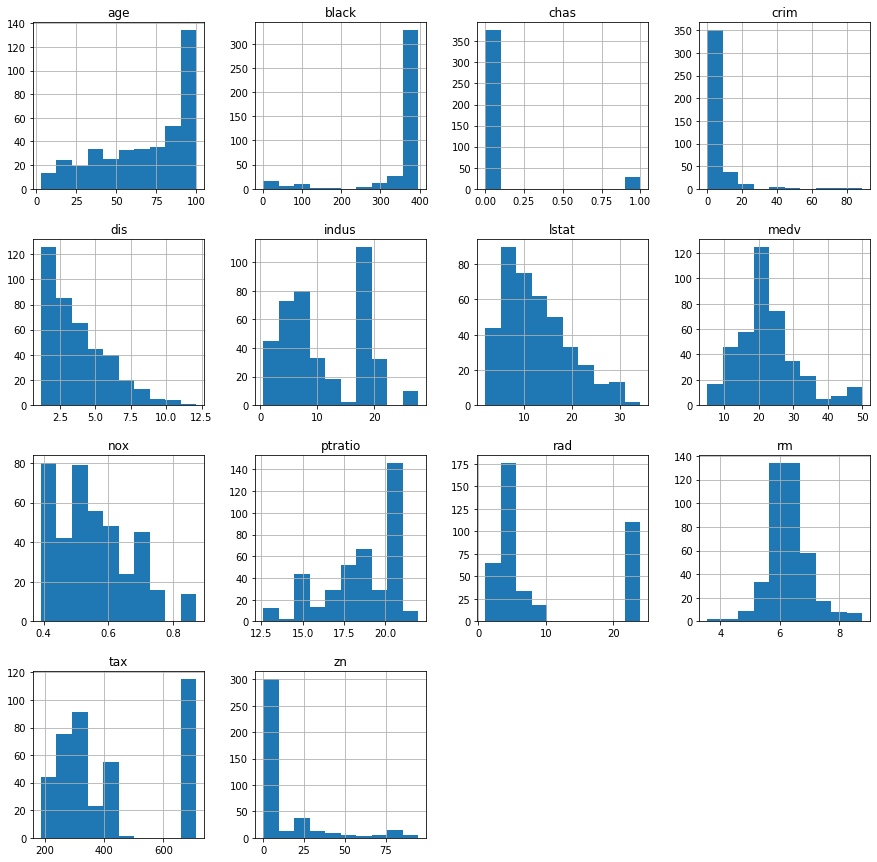

In [13]:
data.hist(figsize=(15,15))
plt.show()

In [15]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = list(data.columns.values)
df_norm.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.996573,-1.000000,-0.241202,-1.0,-0.912317,-0.080284,-0.699279,-0.248325,-0.739130,-0.549618,0.404255,0.899339,-0.500613,-0.257778
1,-0.997820,-0.473684,-0.657625,-1.0,-0.745303,-0.093313,-0.087539,0.051874,-0.391304,-0.629771,0.510638,1.000000,-0.541054,-0.351111
2,-0.992288,-1.000000,-0.307918,-1.0,-0.365344,-0.076068,0.520082,-0.647106,-0.739130,-0.553435,0.234043,0.996672,-0.495098,-0.320000
3,-0.938684,-1.000000,0.401760,-1.0,1.000000,-0.219774,0.894954,-0.934912,-0.652174,-0.175573,-0.553191,0.772808,0.208333,-0.537778
4,-0.999167,-0.557895,-0.620235,-1.0,-0.803758,-0.021268,0.237899,0.030463,-0.739130,-0.786260,-0.106383,0.985224,-0.528186,-0.311111


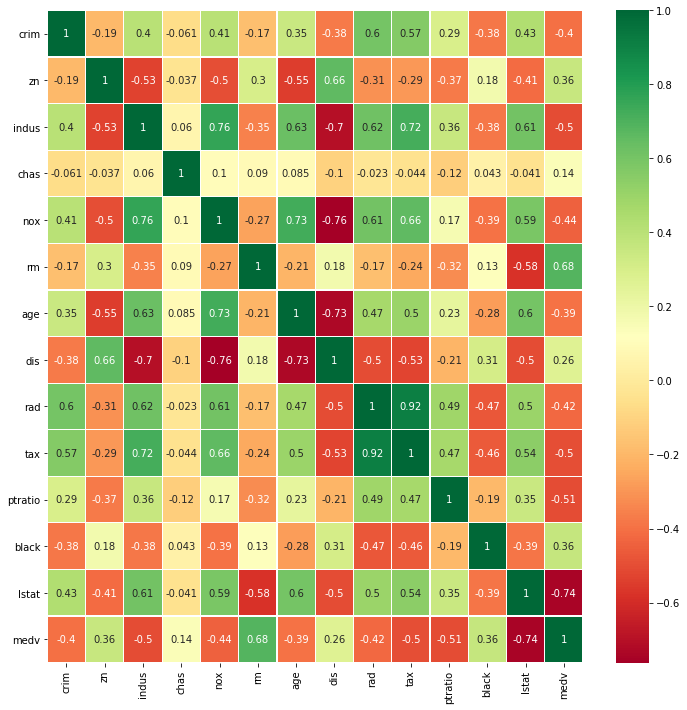

In [22]:
# f, ax = plt.subplots(figsize=(13, 13))
# corr = np.round_(data.corr(), decimals=2)
# sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [19]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


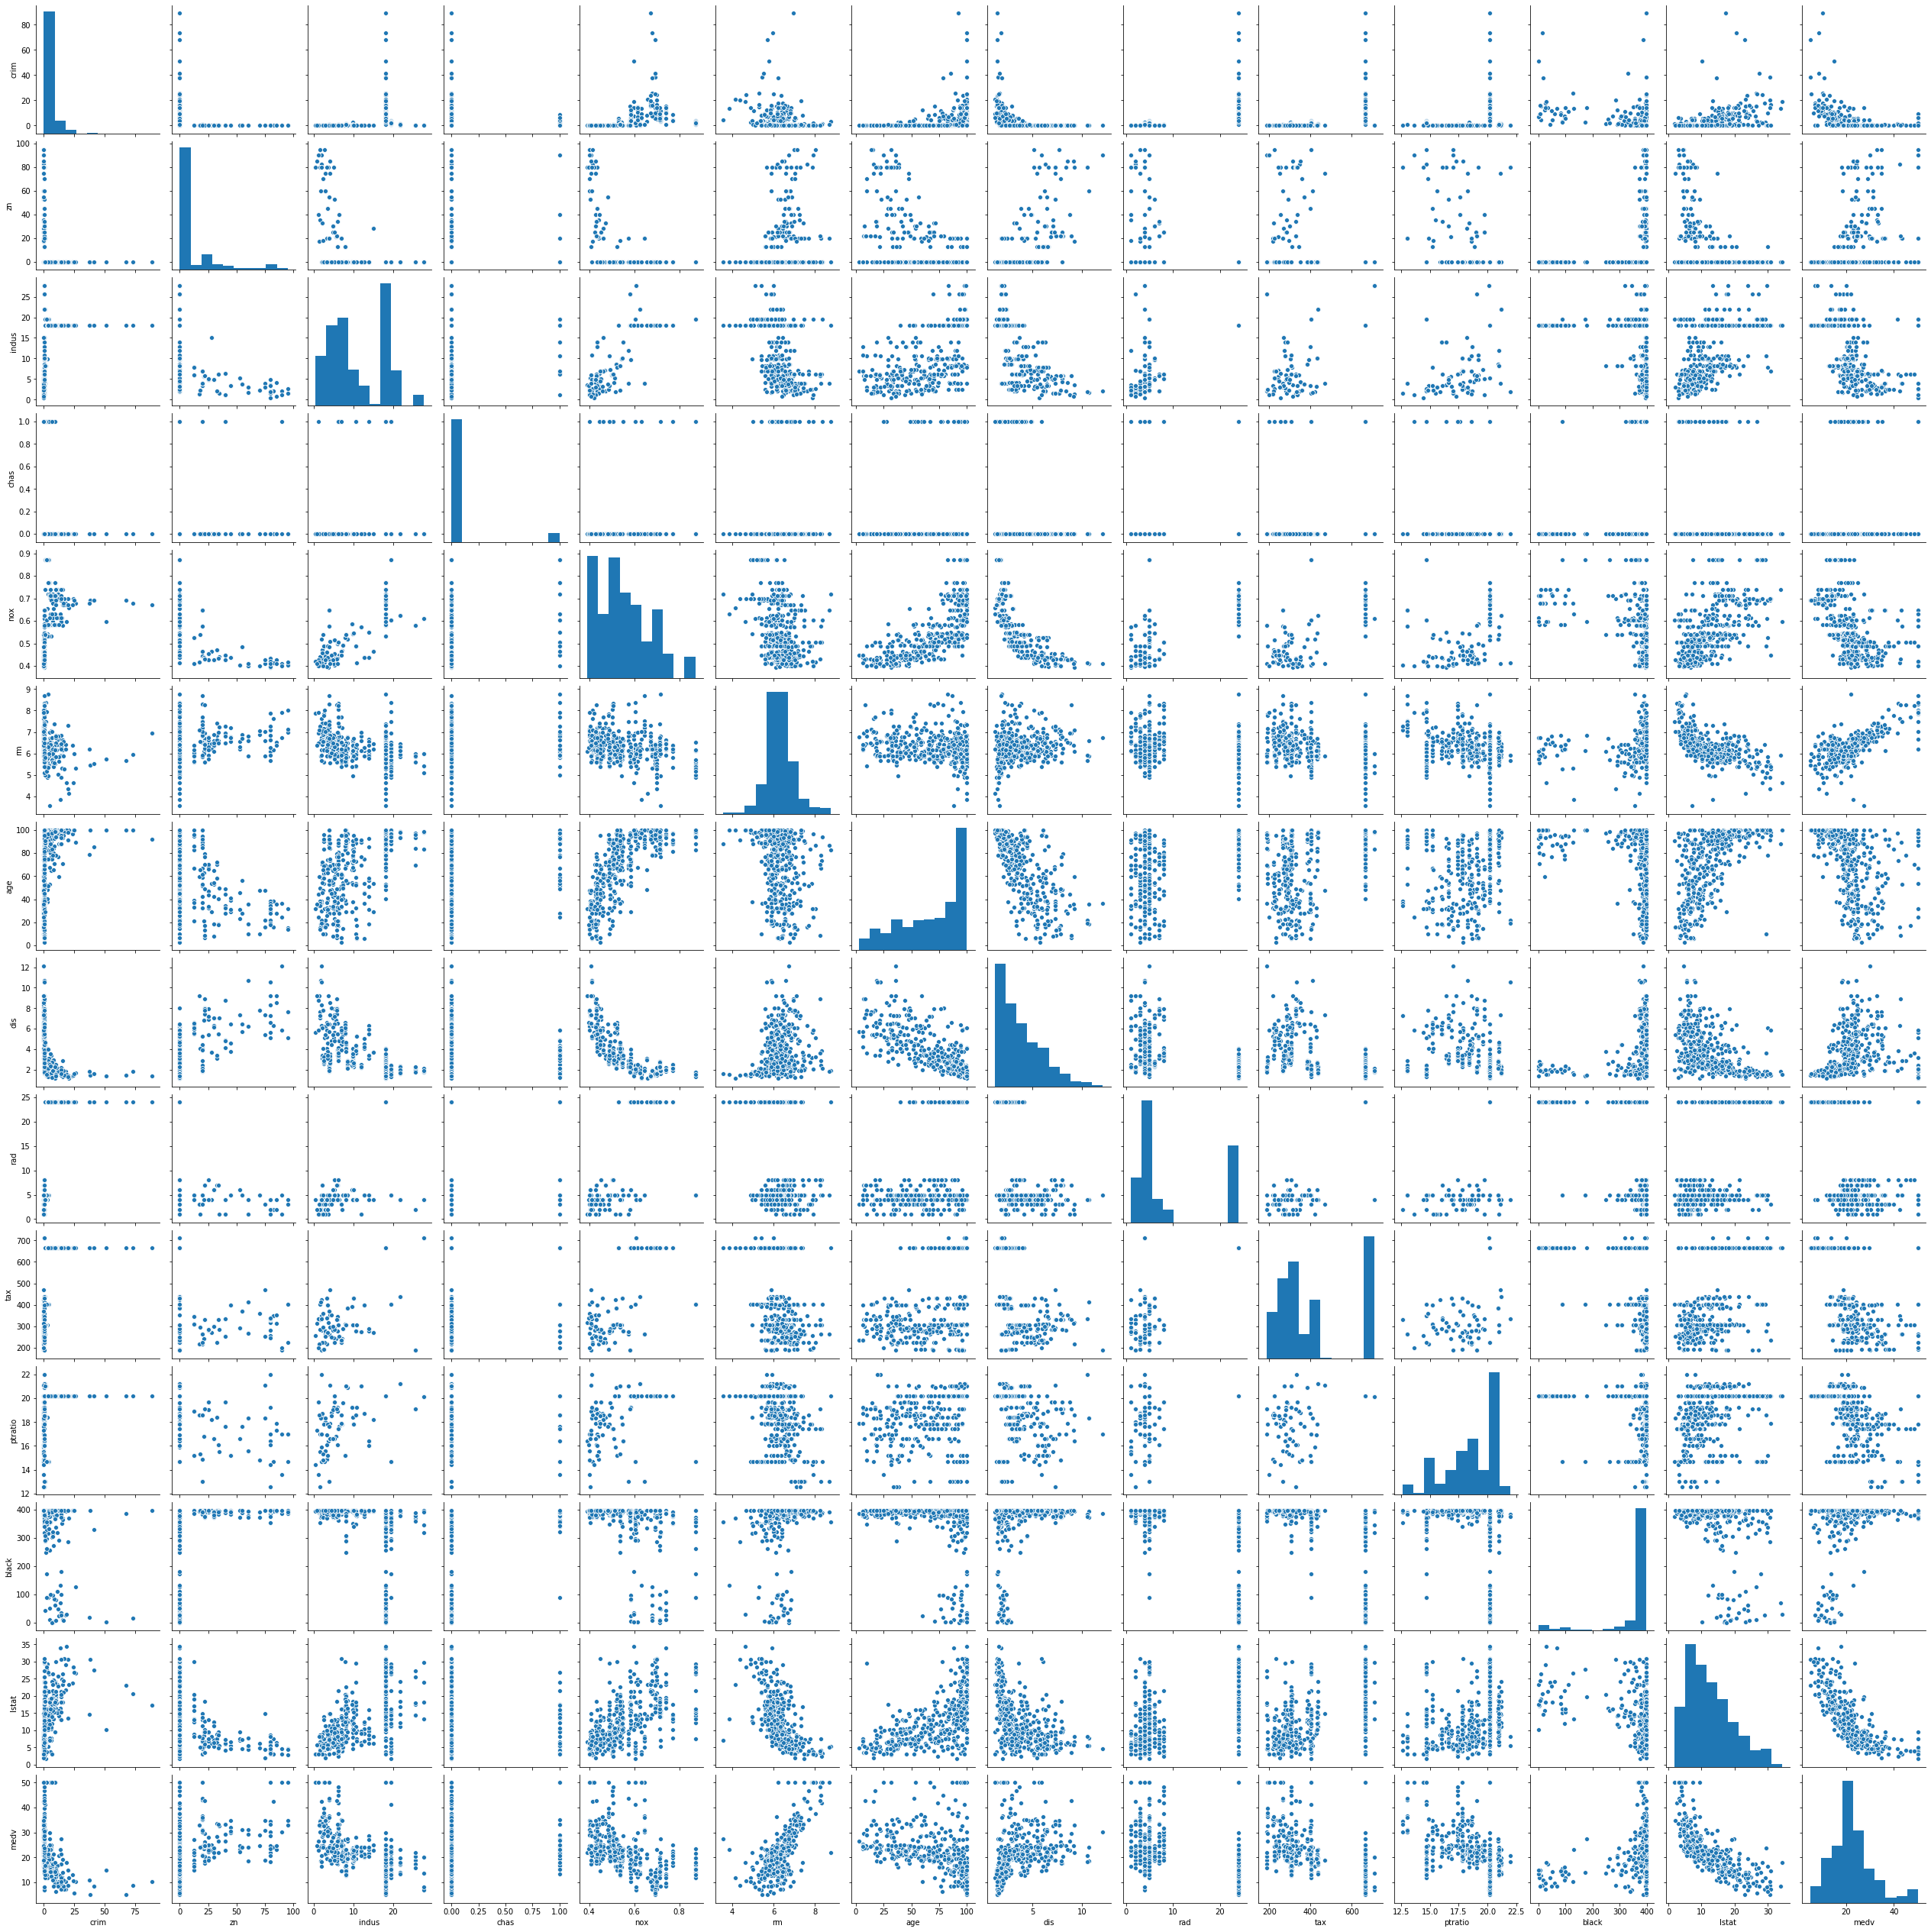

In [20]:
sns.pairplot(data)

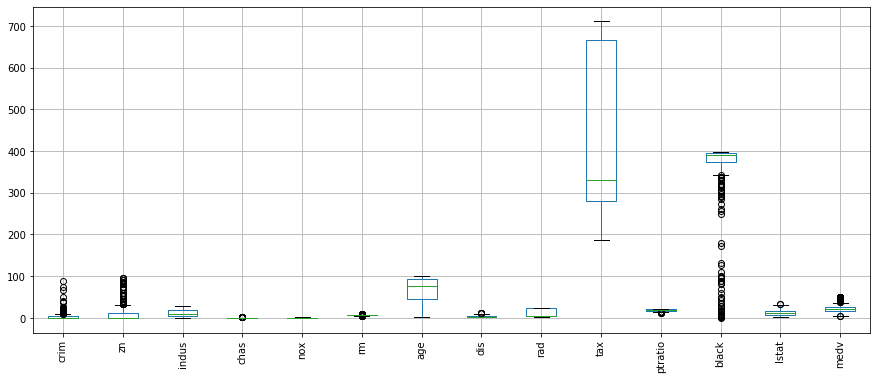

In [11]:
boxplot = data.boxplot(figsize=(15,6), rot=90)

Наибольшая корреляция с величиной medv это lstat, ptratio, tax, rm, indus
Возьмем для обучения только эти столбцы

In [58]:
# создадим новый датасет из вышеперечисленных столбцов
t_data = data[['indus', 'rm', 'ptratio', 'lstat','medv']]
t_data.head()
len(t_data)

404

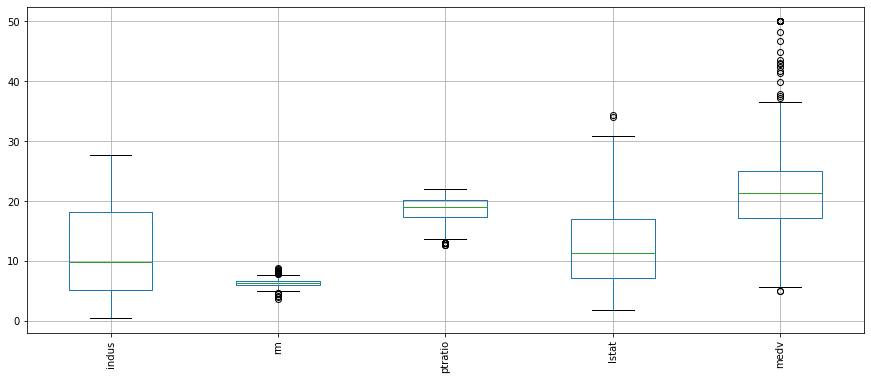

In [59]:
#посмотрим на выбросы наших признаков
boxplot = t_data.boxplot(figsize=(15,6), rot=90)

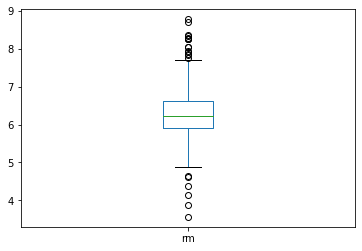

In [60]:
t_data['rm'].plot(kind='box') #выбросы есть у rm, рассмотрим детальнее

In [61]:
len(t_data)

404

In [62]:
t_data = t_data[t_data['rm']<8] #удалим выбросы больше восьми комнат

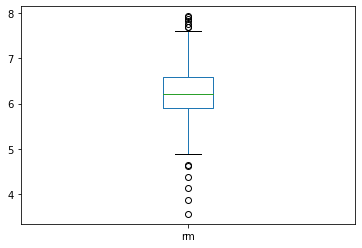

In [63]:
t_data['rm'].plot(kind='box')

In [64]:
len(t_data[t_data['rm']>8])

0

In [65]:
t_data = t_data[t_data['rm']>4] #удалим выбросы меньше четырех комнат

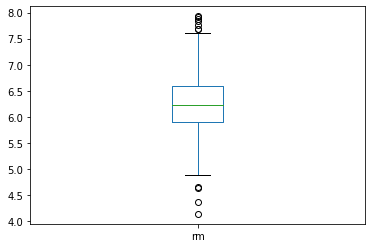

In [66]:
t_data['rm'].plot(kind='box')

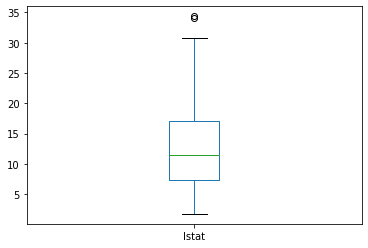

In [67]:
t_data['lstat'].plot(kind='box')# избавимся от выбросов у признака lstat

In [68]:
t_data = t_data[t_data['lstat']<30] #удалим  выбросы lstats, значение больше 30

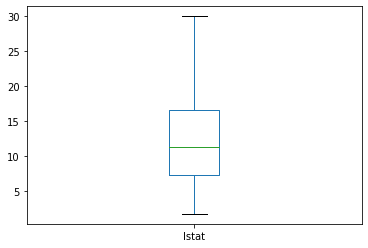

In [69]:
t_data['lstat'].plot(kind='box')

In [70]:
len(t_data)#осталось 385 строк, было 404 - мы немного потеряли от нашего датасета

385

In [71]:
t_data.describe()

,indus,rm,ptratio,lstat,medv
count,385.000000,385.000000,385.000000,385.000000,385.000000
mean,11.142987,6.283332,18.461818,12.484130,21.960000
std,6.826065,0.552851,2.130574,6.451858,8.066473
min,0.460000,4.138000,12.600000,1.730000,5.000000
25%,5.190000,5.924000,17.300000,7.260000,17.200000
50%,9.690000,6.229000,19.000000,11.320000,21.400000
75%,18.100000,6.604000,20.200000,16.590000,24.800000
max,27.740000,7.929000,22.000000,29.970000,50.000000


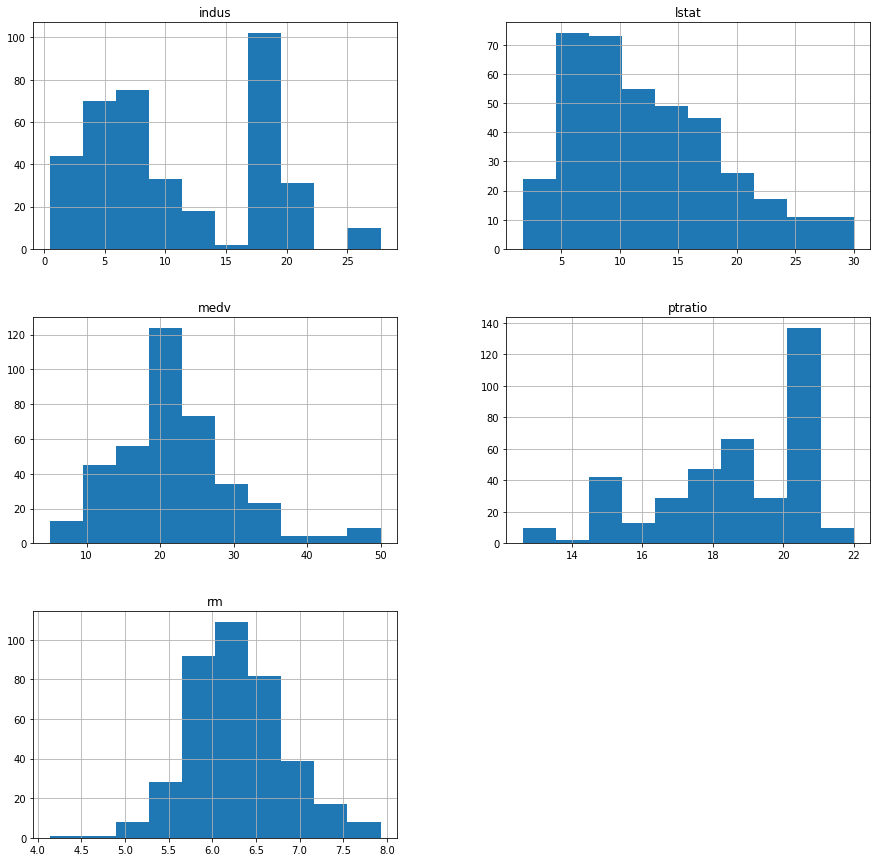

In [72]:
t_data.hist(figsize=(15,15))
plt.show()

Коэффициент корреляции Пирсона: 0.33450337964257704


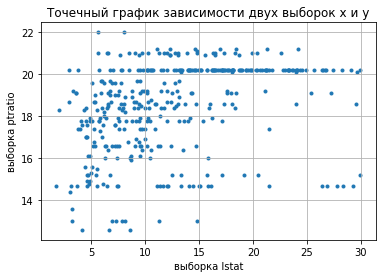

In [78]:
from scipy.stats import pearsonr
lstat = t_data['lstat']
ptratio = t_data['ptratio']
plt.xlabel('выборка lstat')
plt.ylabel('выборка ptratio')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(lstat, ptratio, marker='.')
corr, p_value = pearsonr(lstat, ptratio)
print('Коэффициент корреляции Пирсона:', corr)

In [80]:
#rm похоже на нормальное распределение
def norm_corr(df1,df2):
    plt.plot(df1, df2, 'r.')
#     plt.xlabel(' AveragePrice')
#     plt.ylabel('4046')
    plt.show()
    corr, p_value = pearsonr(df1, df2)
    print(corr)

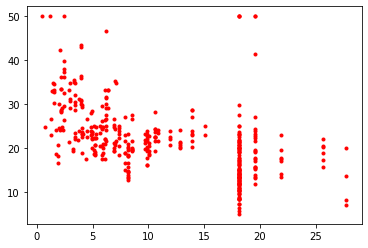

-0.5107821380337281


In [81]:
norm_corr(t_data['indus'],t_data['medv'])

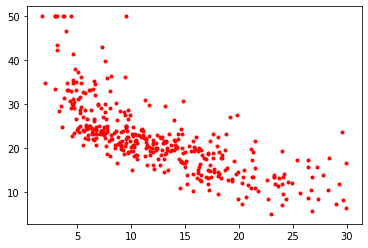

-0.7457291426396313


In [82]:
norm_corr(t_data['lstat'],t_data['medv']) #есть зависимость, видно по графику и по коэффициенту корреляции Пирсона

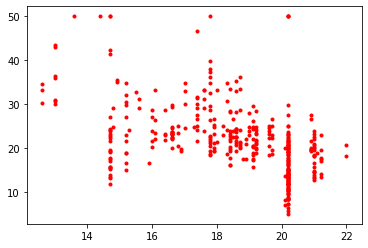

-0.48074316457412003


In [83]:
norm_corr(t_data['ptratio'],t_data['medv'])

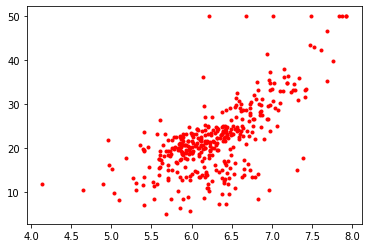

0.6649471210906303


In [84]:
norm_corr(t_data['rm'],t_data['medv'])#есть зависимость, видно по графику и по коэффициенту корреляции Пирсона

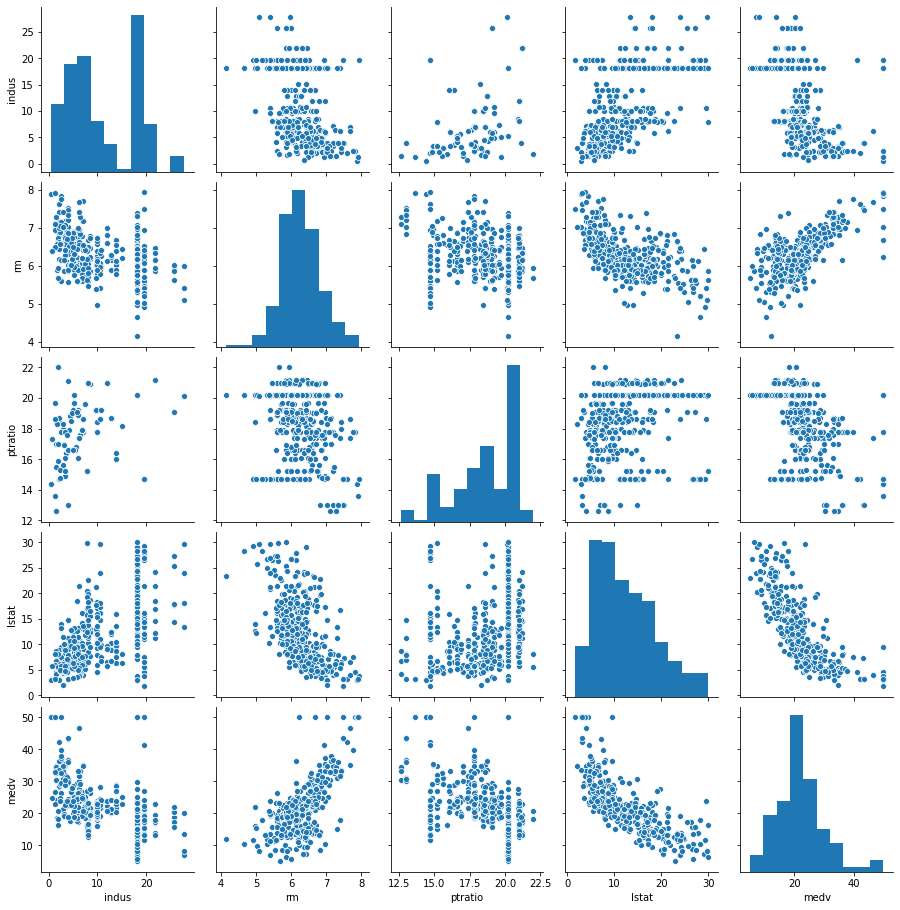

In [85]:
sns.pairplot(t_data)

In [86]:
from sklearn.model_selection import train_test_split

import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.linear_model import LinearRegression


In [87]:
#Обучение модели
X_columns = [c for c in t_data.columns if c != 'medv']
y_column = 'medv'
X = t_data[X_columns]
y = t_data[y_column]


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
train_test_split(X, y, test_size=0.2, random_state=30)
grid_params = {'fit_intercept': [True, False]}
estimator = LinearRegression()
regression_model = GridSearchCV(estimator, grid_params, cv=5, n_jobs=-1, verbose=1)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

# estimator = LinearRegression()
# estimator.fit(X_train, y_train) # Обучение


# y_pred = estimator.predict(X_test)

# print("R2: \t", r2_score(y_test, y_pred))
# print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
# print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


R2: 	 0.7178765640922777
RMSE: 	 4.0220984167102
MAE: 	 2.9991286928882093


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
